<div align="center">
    <img src='Image/LOGOUIS.jpg'/>
    <h1><strong>Comparación de Tratamientos</strong></h1>
    <h2>Óscar Alfonso Gómez Sepúlveda</h2>
    <h3>2198577</h3>
</div>

<div align="center">
    <h3>ANOVA en  el diseño completamente al azar (DCA)</h3>
</div>

## Ejemplo 1

### Comparación de cuatro tipos de cuero. 

Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla siguiente.

In [1]:
# Basic SciPy packages
import numpy as np
import pandas as pd
import math 
from sympy import init_session
init_session(use_latex=True)

# Stats Packages
from scipy import stats
from scipy.stats import t

# Graphing packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
# %matplotlib tk


IPython console for SymPy 1.4 (Python 3.7.4-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:
cvd_dataset = pd.read_csv("CVD_Dataset_EDA_ANOVA.csv")
cvd_pivot = cvd_dataset.pivot(index = 'Tipo de Cuero', columns = 'ID', values = 'Observaciones')
cvd_pivot2 = cvd_dataset.pivot(index = 'ID', columns = 'Tipo de Cuero', values = 'Observaciones')
cvd_pivot

ID,1,2,3,4,5,6
Tipo de Cuero,,,,,,
A,264,260,258,241,262,255
B,208,220,216,200,213,206
C,220,263,219,225,230,228
D,217,226,215,227,220,222


Se presentan los datos con un diagrama de cajas simultáneos que representan una manera descriptiva de comparar
tratamientos

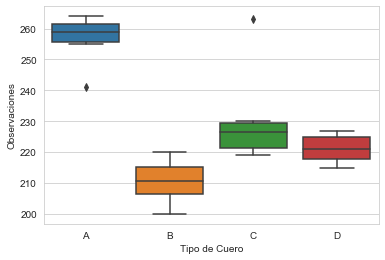

In [3]:
## Create a box plot with updated labels. 
boxplot_for_CVD = sns.boxplot(x = "Tipo de Cuero", y = "Observaciones", data = cvd_dataset)
plt.xlabel(r"Tipo de Cuero")
plt.ylabel(r"Observaciones")

plt.savefig('boxplot_for_CVD.png')

Se pretende llegar a la siguiente tabla llamada Tabla de ANOVA para el DCA

<div align="center">
    <img src='Image/Tabla_ANOVA.PNG'/>
</div>

# Grados de libertad

A continuación, necesitamos determinar los grados de libertad. Los grados de libertad nos dicen cuántos movimientos independientes puede hacer el sistema. Observaremos tres grados diferentes de libertad, df entre tratamientos, df dentro de los tratamientos (error de medición) y df total. Llamaremos a estos dft, dfe, dftotal respetuosamente.

In [4]:
def degrees_of_freedom(df_pivot):
    ## Between samples is across the row
    ## Within samples is down the column
    n = df_pivot.count(axis=1) # Definir el número de repeticiones dentro del tratamiento.
    a = df_pivot.count() # Determinar el número de tratamientos
    n = n.iloc[0]
    a = a.iloc[0]
    
    TotalN = n*a # Número total de datos
    dft = a - 1 #dft son los grados de liberdad de los tratamientos
    dfe = TotalN - a #dfe son los grados de liberdad del error
    dftotal = TotalN-1 #dftotal son los grados de libertad totales 
    return dft, dfe, dftotal, n, a

In [5]:
dft, dfe, dftotal, n, a = degrees_of_freedom(cvd_pivot)

print("Grados de libertadad de los tratamientos: {:d}".format(dft))
print("Grados de libertad del error: {:d}".format(dfe))
print("Grados de libertad Total: {:d}".format(dftotal))

Grados de libertadad de los tratamientos: 3
Grados de libertad del error: 20
Grados de libertad Total: 23


# Suma de Cuadrados

In [6]:
def compute_sums(df_pivot):
    yi_sum = df_pivot.sum() # Suma de cada tratamiento
    yi_avg = df_pivot.mean() # Promedio de cada tratamiento
    y_sum = yi_sum.sum() # Suma total de los datos
    y_avg = yi_avg.mean() # Promedio total de los datos
    return yi_sum, yi_avg, y_sum, y_avg



In [7]:
yi_sum, yi_avg, y_sum, y_avg = compute_sums(cvd_pivot2) #retrieve respective sums 

print(r"La suma de cada tratamiento es: {}".format(yi_sum))
print(r"EL promedio para cada tratamiento es: {}".format(yi_avg))
print(r"La Suma total de los datos es: {:.2f}".format(y_sum))
print(r"El promedio del total de los datos es: {:.2f}".format(y_avg))


La suma de cada tratamiento es: Tipo de Cuero
A    1540
B    1263
C    1385
D    1327
dtype: int64
EL promedio para cada tratamiento es: Tipo de Cuero
A    256.666667
B    210.500000
C    230.833333
D    221.166667
dtype: float64
La Suma total de los datos es: 5515.00
El promedio del total de los datos es: 229.79


### Ecuación de la suma de cuadrados

<div align="center">
    <img src='Image/EqSC.PNG'/>
</div>

* El primer componente es la suma de cuadrados de tratamientos $(SC_{TRAR})$: mide la variación o diferencias entre tratamientos
* EL segundo es la suma de cuadrados del error $(SC_E)$: mide la variación dentro del tratamiento

In [8]:
def Sum_of_Squares(yi_avg, y_avg, df_pivot):
    SCTR = (yi_avg - y_avg)**2 # Calcula la suma de cuadrados entre tratamientos
    SCTR = SCTR.sum()*n
    SCE = df_pivot.sub(yi_avg.values) ** 2 # Calculate sum of squares within treatments
    SCE = SCE.sum().sum()
    SCT = SCTR + SCE # Suma total de los cuadrados
    return SCTR, SCE, SCT

In [9]:
SCTR, SCE, SCT = Sum_of_Squares(yi_avg,y_avg, cvd_pivot2)
print("La suma de cuadrados entre tratamientos es: {:.2f}".format(SCTR))
print("Suma de cuadrados dentro de los tratamientos es: {:.2f}".format(SCE))
print("Suma total de los cuadrados es: {:.2f}".format(SCT))

La suma de cuadrados entre tratamientos es: 7019.46
Suma de cuadrados dentro de los tratamientos es: 2056.50
Suma total de los cuadrados es: 9075.96


### Ecuación de los cuadrados medios

* Las sumas de cuadrados divididas entre sus respectivos grados de libertad se llaman cuadrados medios
* cuadrado medio de tratamientos $(CM_{TRAT})$
* cuadrado medio del error $(CM_E)$


<div align="center">
    <img src='Image/EqCM.PNG'/>
</div>



In [10]:
def Mean_Squares(SCTR, SCE, dft, dfe):
    CMTR = SCTR/(dft) ## Cuadrado medio de tratamientos
    CME = SCE/(dfe) ## Cuadrado medio del error
    return CMTR, CME

In [11]:
CMTR, CME = Mean_Squares(SCTR, SCE, dft, dfe)

print("Cuadrado medio de tratamientos es: {:.2f}".format(CMTR))
print("Cuadrado medio del error es: {:.2f}".format(CME))

Cuadrado medio de tratamientos es: 2339.82
Cuadrado medio del error es: 102.83


### Estadístico de prueba $F_0$

* si $F_0$ es grande, se contradice la hipótesis de que no hay efectos de tratamientos; en cambio, si $F_0$ es pequeño se confirma la validez de $H_0$

<div align="center">
    <img src='Image/EqF0.PNG'/>
</div>

In [12]:
F_0 = CMTR/CME #F-value
p = stats.f.sf(F_0, dft, dfe)

print("F-value is: {:.2f}".format(F_0))
print("p-value is: {:.3f}".format(p))

F-value is: 22.76
p-value is: 0.000


### Tabla ANOVA para DCA

<div align="center">
    <img src='Image/TablaANOVAcueros.PNG'/>
</div>

Como el $valor-p = 0.0000$ es menor que la significancia prefijada $\alpha = 0.05$, se rechaza $H_0$ y se acepta que al menos un par de tipos de cuero tienen un desgaste promedio diferente.

# Ejemplo 2

# Comparación de cuatro métodos de ensamble. 
Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los
cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

In [13]:
cvd_dataset2 = pd.read_csv("CVD_Dataset_EDA_ANOVA2.csv")
cvd_pivot2 = cvd_dataset2.pivot(index = 'Metodo de ensamble', columns = 'ID', values = 'Tiempo de ensamble')
cvd_pivot3 = cvd_dataset2.pivot(index = 'ID', columns = 'Metodo de ensamble', values = 'Tiempo de ensamble')
cvd_pivot2

ID,1,2,3,4
Metodo de ensamble,,,,
A,6,8,7,8
B,7,9,10,8
C,11,16,11,13
D,10,12,11,9


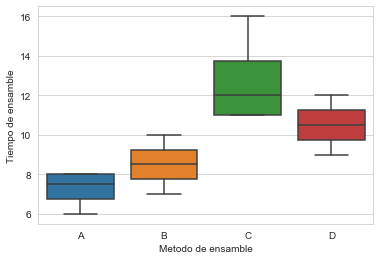

In [14]:
## Create a box plot with updated labels. 
boxplot_for_CVD = sns.boxplot(x = "Metodo de ensamble", y = "Tiempo de ensamble", data = cvd_dataset2)
plt.xlabel(r"Metodo de ensamble")
plt.ylabel(r"Tiempo de ensamble")

plt.savefig('boxplot_for_CVD2.png')

In [15]:
dft, dfe, dftotal, n, a = degrees_of_freedom(cvd_pivot2)

print("Grados de libertadad de los tratamientos: {:d}".format(dft))
print("Grados de libertad del error: {:d}".format(dfe))
print("Grados de libertad Total: {:d}".format(dftotal))

Grados de libertadad de los tratamientos: 3
Grados de libertad del error: 12
Grados de libertad Total: 15


In [16]:
yi_sum, yi_avg, y_sum, y_avg = compute_sums(cvd_pivot3) #retrieve respective sums 

print(r"La suma de cada tratamiento es: {}".format(yi_sum))
print(r"EL promedio para cada tratamiento es: {}".format(yi_avg))
print(r"La Suma total de los datos es: {:.2f}".format(y_sum))
print(r"El promedio del total de los datos es: {:.2f}".format(y_avg))

La suma de cada tratamiento es: Metodo de ensamble
A    29
B    34
C    51
D    42
dtype: int64
EL promedio para cada tratamiento es: Metodo de ensamble
A     7.25
B     8.50
C    12.75
D    10.50
dtype: float64
La Suma total de los datos es: 156.00
El promedio del total de los datos es: 9.75


In [17]:
SCTR, SCE, SCT = Sum_of_Squares(yi_avg,y_avg, cvd_pivot3)
print("La suma de cuadrados entre tratamientos es: {:.2f}".format(SCTR))
print("Suma de cuadrados dentro de los tratamientos es: {:.2f}".format(SCE))
print("Suma total de los cuadrados es: {:.2f}".format(SCT))

La suma de cuadrados entre tratamientos es: 69.50
Suma de cuadrados dentro de los tratamientos es: 29.50
Suma total de los cuadrados es: 99.00


In [18]:
CMTR, CME = Mean_Squares(SCTR, SCE, dft, dfe)

print("Cuadrado medio de tratamientos es: {:.2f}".format(CMTR))
print("Cuadrado medio del error es: {:.2f}".format(CME))

Cuadrado medio de tratamientos es: 23.17
Cuadrado medio del error es: 2.46


In [19]:
F_0 = CMTR/CME #F-value
p = stats.f.sf(F_0, dft, dfe)

print("F-value is: {:.2f}".format(F_0))
print("p-value is: {:.3f}".format(p))

F-value is: 9.42
p-value is: 0.002


### Tabla ANOVA para DCA

<div align="center">
    <img src='Image/TablaANOVAensamble.PNG'/>
</div>

En la tabla se muestra el análisis de varianza correspondiente, en donde se aprecia que el valor del $valor-p = 0.0018$ es menor que $\alpha = 0.05$, por lo que se rechaza $H_0$ en este nivel de significancia en particular, lo que significa que los tiempos promedio de al menos dos métodos de ensamble son estadísticamente diferentes.

# Comparaciones o pruebas de rango múltiples

Después de que se rechazó la hipótesis nula en un análisis de varianza, es necesario ir a detalle y ver cuáles tratamientos son diferentes. A continuación veremos tres estrategias distintas para ir a ese detalle.

### Método LSD (diferencia mínima significativa)

Es la diferencia mínima que debe existir entre dos medias muestrales para considerar que los tratamientos correspondientes son significativamente diferentes

<div align="center">
    <img src='Image/LSD.PNG'/>
</div>

con el ANOVA se rechazó la hipótesis $H_0 : \mu_A = \mu_B = \mu_C = \mu_D $ y se acepta que al menos un par de medias de tratamientos (métodos de ensamble) son diferentes entre sí. Para investigar cuáles pares de medias son estadísticamente diferentes se prueban los seis posibles pares de hipótesis:

<div align="center">
    <img src='Image/Hipotesis.PNG'/>
</div>

Si usamos una significancia predefinida de $\alpha = 0.05$, de la tabla de la distribución T de Student con 12 grados de libertad, se obtiene que t0.025, 12 = 2.18

In [20]:
t = 2.18

LSD = t*math.sqrt(2*CME/n)
LSD

* La decisión sobre cada una de las seis hipótesis listadas arriba se obtiene al comparar las correspondientes diferencias de medias muestrales en valor absoluto con el número LSD
* Se declaran significativas aquellas diferencias que son mayores a este número.

Descviaciones de la media global

In [21]:
Des = yi_avg - y_avg
Des

Metodo de ensamble
A   -2.50
B   -1.25
C    3.00
D    0.75
dtype: float64

In [22]:
Sig1 = abs(Des[0] - Des[1])
Sig2 = abs(Des[0] - Des[2])
Sig3 = abs(Des[0] - Des[3])
Sig4 = abs(Des[1] - Des[2])
Sig5 = abs(Des[1] - Des[3])
Sig6 = abs(Des[2] - Des[3])
Sig = ([Sig1, Sig2, Sig3, Sig4, Sig5, Sig6])
Sig

<div align="center">
    <img src='Image/TablaSig.PNG'/>
</div>

### Método de Tukey

Un método más conservador para comparar pares de medias de tratamientos es el método de Tukey, el cual consiste en comparar las diferencias entre medias muestrales con el valor crítico dado por:

<div align="center">
    <img src='Image/EqTukey.PNG'/>
</div>

* El estadístico $q_{\alpha}(k, N – k)$ son puntos porcentuales de la distribución del rango estudentizado.
* A diferencia de los métodos LSD y Duncan, el método de Tukey trabaja con un error a muy cercano al declarado por el experimentador.

De las tablas del rango estudentizado dadas en el apéndice, para $\alpha = 0.05$, se obtiene $q_{0.05}(4, 12) = 4.20$

In [23]:
q = 4.20
T = q*math.sqrt(CME/n)
T

al compararlo con las diferencias de medias muestrales, los resultados sobre las seis hipótesis son:

<div align="center">
    <img src='Image/TablaTukey.PNG'/>
</div>

* De esta tabla se concluye que $\mu_A = \mu_B = \mu_D, \mu_C = \mu_D, \mu_A \neq \mu_C$ y $\mu_B \neq \mu_C$
* Observe que esta prueba no encuentra diferencia entre los métodos de ensamble A y D, la cual sí se detectó con el método LSD.
* Esto es congruente con el hecho de que la prueba de Tukey es menos potente que la prueba LSD, por lo que las pequeñas diferencias no son detectadas como significativas.
* En la práctica, después de que se ha rechazado $H_0$ con el ANOVA, conviene aplicar ambos métodos (LSD y Tukey) u otros, cuando haya dudas sobre cuál es el tratamiento ganador.

### Método de Duncan

En este método para la comparación de medias, si las k muestras son de igual tamaño, los k promedios se acomodan en orden ascendente y el error estándar de los promedios se estima con:

<div align="center">
    <img src='Image/EqDuncan.PNG'/>
</div>

De la tabla de rangos significantes de Duncan dada en el apéndice, para $ \alpha = 0.05$ y 12 grados de libertad, se leen los rangos $r_{0.05}(2, 12) = 3.08,$ $ r_{0.05}(3, 12) = 3.23$ y $r_{0.05}(4, 12) = 3.33$. Con esta información, los rangos mínimos significantes son:

<div align="center">
    <img src='Image/DuncanR.PNG'/>
</div>

Las medias muestrales se ordenan de manera ascendente

In [24]:
yi_o = sorted(yi_avg)
yi_o

De aquí se obtienen las diferencias en el orden dado por el método de Duncan y se van comparando con el rango correspondiente

<div align="center">
    <img src='Image/TablaDuncan.PNG'/>
</div>

De esta tabla se concluye que $\mu_A = \mu_B$, $\mu_B = \mu_D$ y $\mu_C = \mu_D$, mientras que $\mu_A \neq \mu_C$, $\mu_B \neq \mu_C$ y $\mu_A \neq \mu_D$, que son las mismas conclusiones que se obtuvieron con el método LSD. En general, las pruebas de Duncan y LSD tienen un desempeño similar.

# Elección del tamaño de la muestra

+ Una decisión importante en cualquier diseño de experimentos es decidir el número de réplicas que se hará por cada tratamiento (tamaño de muestra). Por lo general, si se esperan diferencias pequeñas entre tratamientos será necesario un mayor tamaño de muestra. Aunque existen varios métodos para estimar el tamaño muestral, muchas veces tienen poca aplicabilidad porque requieren cierto conocimiento previo sobre la varianza del error experimental.

* A menor diferencia que se espera en los tratamientos, mayor será la cantidad de réplicas si se quieren detectar diferencias significativas, y viceversa, es decir, si se esperan grandes diferencias quizá con pocas réplicas sea suficiente.
* Si se espera mucha variación dentro de cada tratamiento, debido a la variación de fuentes no controladas como métodos de medición, medio ambiente, materia prima, etc., entonces se necesitarán más réplicas.
* Si son varios tratamientos (cuatro o más), entonces éste es un punto favorable para reducir el número de réplicas.


## Elección del tamaño de muestra por intervalo de confianza

* Número de Tratamientos $(k)$
* Propuesta inicial del número de réplicas por tratamiento que va a utilizar $(n_0)$
* Desviación estándar del error aleatorio $(\sigma)$
* Magnitud de las diferencias entre tratamientos $(d_T)$

Ejemplo de los métodos de ensamble:
* $k = 4$
* $n_0 = 5 $ pruebas
* $d_T = 2 $ minutos
* $\sigma = 1.5$ variabilidad intrínseca de cada método

Diferencia mínima significativa entre tratamientos:

<div align="center">
    <img src='Image/LSD.PNG'/>
</div>

Despejando $n$

<div align="center">
    <img src='Image/MuestraN.PNG'/>
</div>


Si la significancia es $\alpha = 0.05$, entonces en esta fórmula se hacen las siguientes sustituciones: $N = k × n_0"$, $CME = \sigma^2$, $LSD = d_T$; de esta forma, el tamaño de muestra que tentativamente se debe usar está dado por:

<div align="center">
    <img src='Image/MuestraNN.PNG'/>
</div>

El valor de n arrojado por esta fórmula dará una idea del número de réplicas por tratamiento.


Al aplicar esta expresión al caso de los cuatro métodos de ensamble obtenemos:

<div align="center">
    <img src='Image/ResEjemMuestra.PNG'/>
</div>

Por lo tanto, $n = 5$ se debería utilizar como tamaño de muestra (número de pruebas por tratamiento).